In [37]:
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
import cv2
import numpy as np

# I - Basic Transformations

## 1 - Displaying an image with OpenCV and Pillow

Image Shape : (552, 550, 3)
[[[226 137 125]
  [226 137 126]
  [225 137 127]
  ...
  [234 149 125]
  [233 148 122]
  [233 147 122]]

 [[226 137 125]
  [226 137 126]
  [224 137 127]
  ...
  [233 148 124]
  [233 147 122]
  [232 146 121]]

 [[226 137 125]
  [225 137 126]
  [224 137 127]
  ...
  [233 148 124]
  [232 146 121]
  [231 146 121]]

 ...

 [[ 82  21  58]
  [ 83  21  58]
  [ 86  23  59]
  ...
  [173  70  83]
  [178  71  81]
  [179  71  80]]

 [[ 82  22  57]
  [ 83  23  57]
  [ 85  24  59]
  ...
  [175  70  83]
  [179  69  81]
  [181  69  80]]

 [[ 82  23  55]
  [ 83  23  56]
  [ 85  25  59]
  ...
  [175  69  83]
  [180  69  81]
  [182  69  80]]]


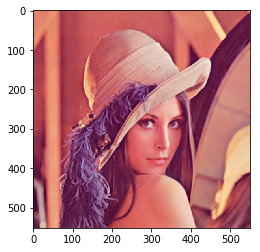

In [4]:
# using OpenCV
cv_img = cv2.imread("../lena.png")
cv_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)

print("Image Shape : %s" % str(cv_img.shape))
print(cv_img)

plt.imshow(cv_img, cmap=plt.cm.gray)

# using Pillow
img = Image.open("../lena.png")

plt.imshow(img,cmap=plt.cm.gray)

print("Image Shape : %s" % str(np.array(img).shape))
print(np.array(img))

## 2 - Grayscale

Image Shape : (552, 550)
[[162 162 162 ... 172 170 170]
 [162 162 162 ... 171 170 169]
 [162 162 162 ... 171 169 169]
 ...
 [ 43  44  46 ... 102 104 104]
 [ 44  45  46 ... 103 103 104]
 [ 44  45  47 ... 102 104 104]]


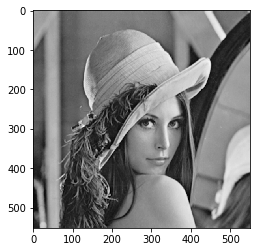

In [6]:
# using OpenCV
cv_img_gray = cv2.cvtColor(cv_img, cv2.COLOR_RGB2GRAY)

print("Image Shape : %s" % str(np.array(cv_img_gray).shape))
print(np.array(cv_img_gray))

plt.imshow(cv_img_gray, cmap=plt.cm.gray)

Image Shape : (552, 550)
[[162 162 162 ... 171 170 169]
 [162 162 161 ... 170 169 168]
 [162 162 161 ... 170 168 168]
 ...
 [ 43  43  45 ... 102 104 104]
 [ 43  44  46 ... 102 103 103]
 [ 44  44  46 ... 102 103 104]]


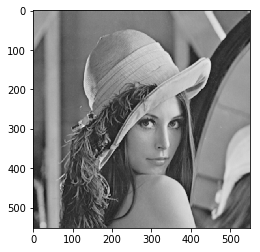

In [7]:
# using Pillow
img_gray = img.convert('L')
plt.imshow(img_gray , cmap=plt.cm.gray)

print("Image Shape : %s" % str(np.array(img_gray).shape))
print(np.array(img_gray))

## 3.1 & 3.2 - Global and Adaptive Binarization

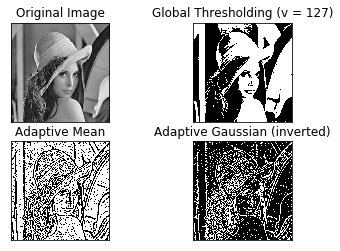

In [8]:
# using OpenCV
titles = ['Original Image', 'Global Thresholding (v = 127)', 'Adaptive Mean', 'Adaptive Gaussian (inverted)']
images = [
    cv_img_gray,
    cv2.threshold(cv_img_gray, 127, 255, cv2.THRESH_BINARY)[1], 
    cv2.adaptiveThreshold(cv_img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2),
    cv2.adaptiveThreshold(cv_img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2),
]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

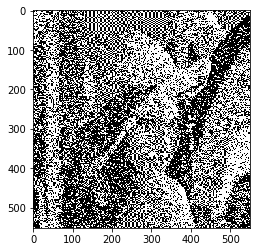

In [9]:
# using Pillow
img_bin = img_gray.convert('1')
plt.imshow(img_bin)

## 3.3 - Handmade Binarization

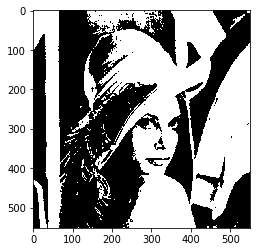

In [10]:
# handmade
THRESHOLD = 127

def binarize_image(img):
    array  = np.array(img)
    rows, cols = array.shape
    for i in range(rows):
        for j in range(cols):
            if array[i][j] > THRESHOLD:
                array[i][j] = 255
            else:
                array[i][j] = 0
    return Image.fromarray(array)

plt.imshow(binarize_image(img_gray))

## 4 - Rotation

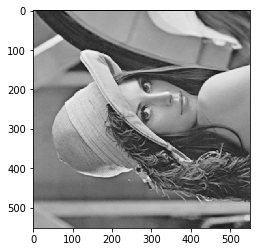

In [11]:
# using OpenCV
rows,cols = cv_img_gray.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
plt.imshow(cv2.warpAffine(cv_img_gray,M,(cols,rows)), cmap=plt.cm.gray)

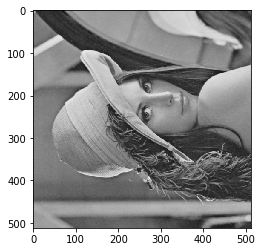

In [13]:
# using Pillow
plt.imshow(img_gray.rotate(90), cmap=plt.cm.gray)

## 5 - Translation

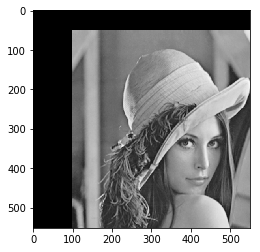

In [12]:
# using OpenCV
kernel = np.float32([[1,0,100],
                      [0,1,50]])

plt.imshow(cv2.warpAffine(cv_img_gray,kernel,(cols,rows)), cmap=plt.cm.gray)

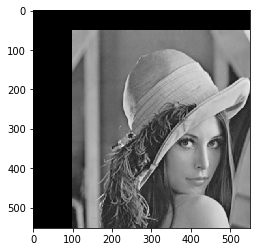

In [13]:
# using Pillow
plt.imshow(img_gray.transform(img_gray.size, Image.AFFINE, (1, 0, -100, 0, 1, -50)))

## 6 - Shearing

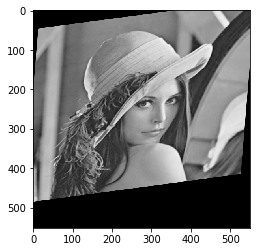

In [14]:
# using OpenCV
origin = np.float32([[50,50],[200,50],[50,200]])
target = np.float32([[60,80],[210,60],[50, 200]])

M = cv2.getAffineTransform(origin, target)

plt.imshow(cv2.warpAffine(cv_img_gray, M,(cols,rows)), cmap=plt.cm.gray)

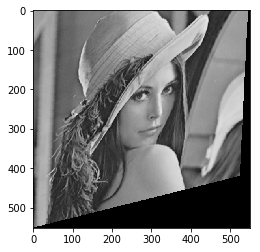

In [15]:
# using Pillow
plt.imshow(img_gray.transform(img_gray.size, Image.AFFINE, (1, 0.05, 5, 0.25, 1, 1)))

# II - Filters Convolution

## 1 - Blurring/Averaging

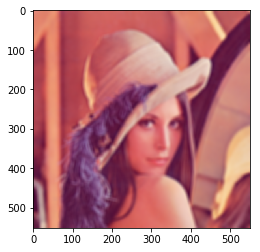

In [16]:
def blur(degree):
    kernel = np.ones((degree,degree),np.float32)/(degree*degree)
    return kernel

plt.imshow(cv2.filter2D(cv_img, -1, blur(10)))

## 2 - Sharpening

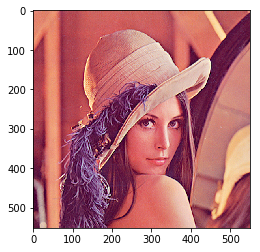

In [20]:
def sharpen():
    kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
    return kernel

plt.imshow(cv2.filter2D(cv_img, -1, sharpen()))

## 3 - Edge Detection

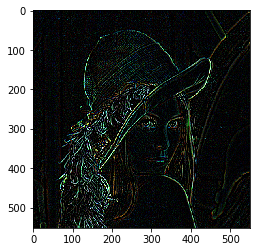

In [31]:
def detect_edges(factor):
    kernel = np.array([[-1,-1,-1], 
                       [-1, 8,-1], 
                       [-1,-1,-1]])
    return kernel*factor

plt.imshow(cv2.filter2D(cv_img, -1, detect_edges(2)))